In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv("salary_data_cleaned.csv")
df


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,max_sal,avg_sal,company_age,python,R,spark,machine_learning,AI,hadoop,sql
0,Data Science Internship,₹1L - ₹6L,We are providing six month training for data s...,-1.0,Oracuz Infotech Pvt Ltd Company,Thiruvananthapuram,-1,-1,-1,-1,...,6,3.5,-1,0,0,0,0,1,0,0
1,Urgent Opening for DATA SCIENTIST ROLE,₹9L,Experience: Fresher\r\nLocation:Work from Home...,-1.0,iTech Analytic Solutions,Remote,-1,-1,-1,-1,...,0,4.5,-1,0,0,0,1,0,0,0
2,Data Scientist,₹5L - ₹20L,Data Scientist\r\nWe are seeking a Data Scient...,-1.0,Bridgetree Research Services Pvt. Ltd.,Bangalore,-1,-1,-1,-1,...,20,12.5,-1,0,0,0,1,1,0,0
3,Data Scientist,₹30L - ₹45L,Job Description\r\nRoles and Responsibilities\...,4.0,Jubilant FoodWorks,Noida,10000+ Employees,1995,Company - Public,Fast-Food & Quick-Service Restaurant,...,45,37.5,27,0,0,0,0,0,0,0
4,Geoinformatics Data Scientist & Programmer (Re...,₹12L - ₹23L,Join CIFOR and make a difference!\r\nGeoinform...,3.8,World Agroforestry Centre,New Delhi,201 to 500 Employees,-1,Unknown / Non-Applicable,-1,...,23,17.5,-1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,Big Data Engineer (Python),₹5L - ₹18L,"StartUs Insights, an international data scienc...",4.5,StartUs Insights,Remote,1 to 50 Employees,2014,Company - Private,Internet,...,18,11.5,8,1,0,0,0,1,0,1
643,Microsoft / AWS Data Analytics / Engg Intern (...,₹60T - ₹72T,We are leaders in Microsoft certified training...,-1.0,Instrovate Technologies,New Delhi,-1,-1,-1,-1,...,72,66.0,-1,0,0,0,1,1,0,0
644,Data Scientist,₹5L - ₹10L,Hiring Experienced Data Scientist in a Reputed...,4.0,2COMS Consulting Private Limited,Mumbai,10000+ Employees,1988,Company - Private,Telecommunications Service,...,10,7.5,34,1,0,0,1,1,0,1
645,Urgent Opening for DATA SCIENTIST ROLE,₹9L,Experience: Fresher\r\nLocation:Work from Home...,-1.0,iTech Analytic Solutions,Remote,-1,-1,-1,-1,...,0,4.5,-1,0,0,0,1,0,0,0


In [3]:
#job title and seniority
df["Job Title"]= df["Job Title"].apply(lambda x: str(x))
                      
def title_simplified(title):
    if "analyst" in title.lower() or "analytics"  in title.lower():
        return "Data Analyst"
    elif "data scientist"  in title.lower() or "data science"  in title.lower() or "data & applied scientist" in title.lower() :
        return "Data Scientist"
    elif "machine learning"  in title.lower() :
        return "MLE"
    elif "data engineer" in title.lower()  :
        return "Data Engineer " 
    elif "computer vision" in title.lower()  :
        return "Computer Vision Specialist " 
    elif "decision scientist" in title.lower()  :
        return "Decision Scientist " 
    else:
        return "NA"
    
def job_seniority(title):
    if "senior"  in title.lower() or "sr."  in title.lower():
        return "senior"
    elif "junior"  in title.lower() or "jr."  in title.lower():
        return "junior"
    else:
        return "na"
    
df["title"]= df["Job Title"].apply(title_simplified)

df["seniority"]= df["Job Title"].apply(job_seniority)
df["title"].value_counts()

Data Scientist                 495
Data Analyst                   110
Computer Vision Specialist      12
Decision Scientist              11
NA                               8
MLE                              6
Data Engineer                    5
Name: title, dtype: int64

In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'per hour', 'per month', 'min_sal',
       'max_sal', 'avg_sal', 'company_age', 'python', 'R', 'spark',
       'machine_learning', 'AI', 'hadoop', 'sql', 'title', 'seniority'],
      dtype='object')

In [5]:
#Desc length
df["desc_len"]= df["Job Description"].apply(lambda x : len(x))

df['sal_lac'] = df['Salary Estimate'].apply(lambda x: 1 if "L" in x.upper() else 0)
df['sal_k'] = df['Salary Estimate'].apply(lambda x: 1 if "T" in x.upper() else 0)

#hourly wage to annual
df["min_sal"]= df.apply(lambda x : x.min_sal*2 if x["per hour"]==1 else x.min_sal,axis=1)
df["max_sal"]= df.apply(lambda x : x.max_sal*2 if x["per hour"]==1 else x.max_sal,axis=1)
df[df["per hour"]==1][["per hour","min_sal","max_sal"]]

#monthly wage to annual
df["min_sal"]= df.apply(lambda x : x.min_sal*12 if x["per month"]==1 else x.min_sal,axis=1)
df["max_sal"]= df.apply(lambda x : x.max_sal*12 if x["per month"]==1 else x.max_sal,axis=1)


In [6]:
df.describe()

,Rating,Founded,per hour,per month,min_sal,max_sal,avg_sal,company_age,python,R,spark,machine_learning,AI,hadoop,sql,desc_len,sal_lac,sal_k
count,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.0,647.000000,647.000000,647.000000,647.000000,647.000000,647.00000,647.000000,647.000000
mean,2.968779,1569.251932,0.004637,0.026275,38.162287,37.097372,16.213292,42.942813,0.344668,0.0,0.043277,0.459042,0.585781,0.006182,0.163833,974.42813,0.969088,0.026275
std,2.037090,793.416875,0.067988,0.160076,200.514871,136.532347,42.708858,55.250245,0.475628,0.0,0.203637,0.498705,0.492968,0.078445,0.370410,718.84262,0.173213,0.160076
min,-1.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,1.500000,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,81.00000,0.000000,0.000000
25%,3.600000,1850.000000,0.000000,0.000000,5.000000,8.000000,7.000000,7.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,599.00000,1.000000,0.000000
50%,4.000000,1988.000000,0.000000,0.000000,8.000000,14.000000,11.000000,34.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,778.00000,1.000000,0.000000
75%,4.000000,1988.000000,0.000000,0.000000,12.000000,18.000000,12.500000,34.000000,1.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,1132.00000,1.000000,0.000000
max,5.000000,2019.000000,1.000000,1.000000,3000.000000,864.000000,750.000000,238.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,10460.00000,1.000000,1.000000


In [7]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'per hour', 'per month', 'min_sal',
       'max_sal', 'avg_sal', 'company_age', 'python', 'R', 'spark',
       'machine_learning', 'AI', 'hadoop', 'sql', 'title', 'seniority',
       'desc_len', 'sal_lac', 'sal_k'],
      dtype='object')

<AxesSubplot:>

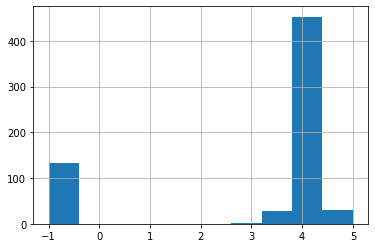

In [8]:
df.Rating.hist()

<AxesSubplot:>

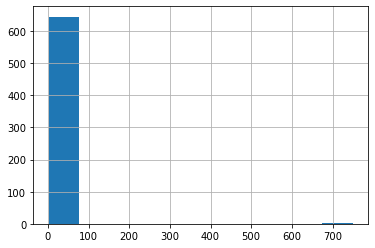

In [9]:
df.avg_sal.hist()

<AxesSubplot:>

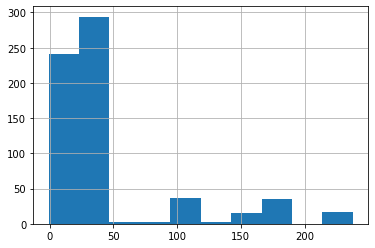

In [10]:
df.company_age.hist()

<AxesSubplot:>

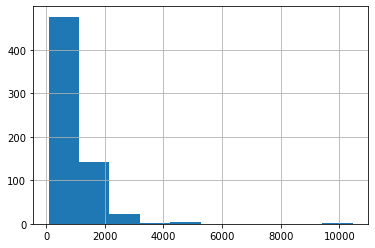

In [11]:
df.desc_len.hist()

<AxesSubplot:>

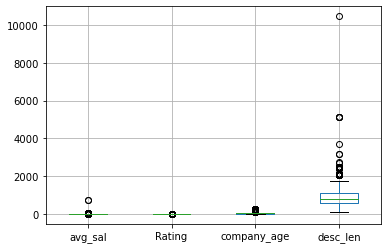

In [12]:
df.boxplot(column=["avg_sal","Rating","company_age","desc_len"])


<AxesSubplot:>

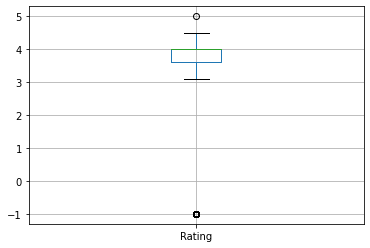

In [13]:
df.boxplot(column="Rating")

In [14]:
df[["avg_sal","Rating","company_age","desc_len"]].corr()

,avg_sal,Rating,company_age,desc_len
avg_sal,1.000000,-0.121891,-0.114045,-0.052965
Rating,-0.121891,1.000000,0.359557,0.224807
company_age,-0.114045,0.359557,1.000000,0.207343
desc_len,-0.052965,0.224807,0.207343,1.000000


<AxesSubplot:>

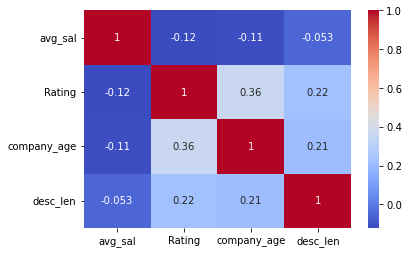

In [15]:
sn.heatmap(df[["avg_sal","Rating","company_age","desc_len"]].corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [16]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'per hour', 'per month', 'min_sal',
       'max_sal', 'avg_sal', 'company_age', 'python', 'R', 'spark',
       'machine_learning', 'AI', 'hadoop', 'sql', 'title', 'seniority',
       'desc_len', 'sal_lac', 'sal_k'],
      dtype='object')

In [17]:
#categorical data Graph plotting

df_categorical=df[['Location','Size', 'Type of ownership',
       'Industry', 'Sector','Revenue','python', 'R', 'spark',
       'machine_learning', 'AI', 'hadoop', 'sql', 'title', 'seniority', 'Company Name']]

Graph for Location : total categories= 18


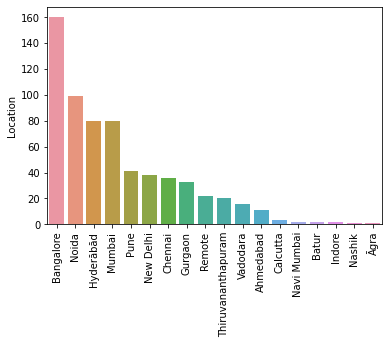

Graph for Size : total categories= 9


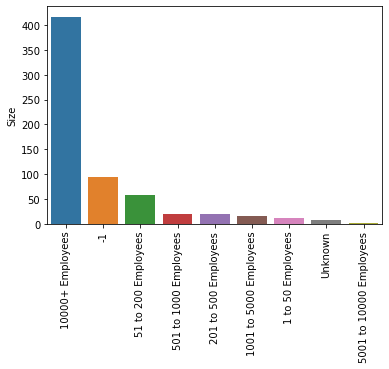

Graph for Type of ownership : total categories= 9


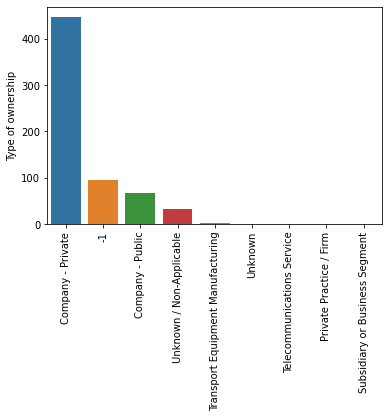

Graph for Industry : total categories= 24


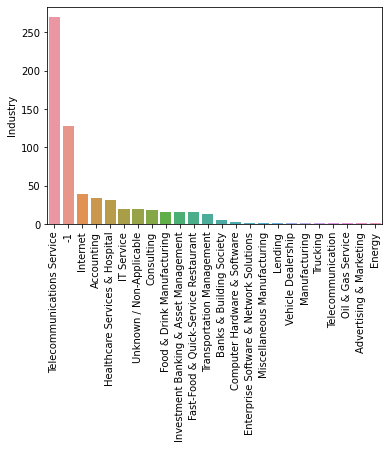

Graph for Sector : total categories= 14


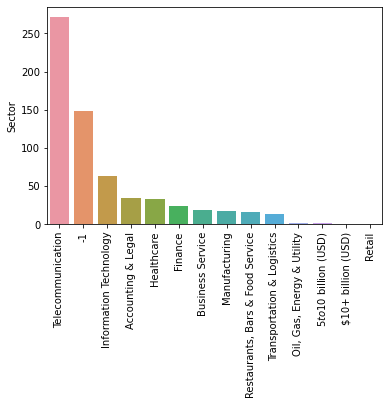

Graph for Revenue : total categories= 10


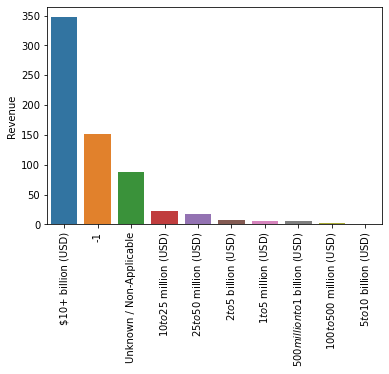

Graph for python : total categories= 2


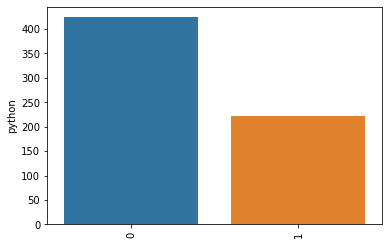

Graph for R : total categories= 1


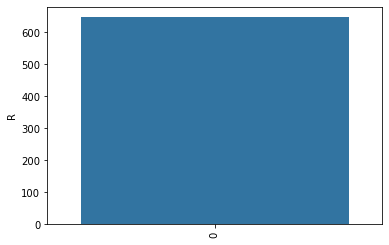

Graph for spark : total categories= 2


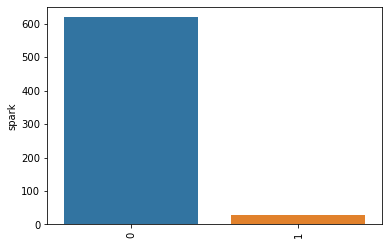

Graph for machine_learning : total categories= 2


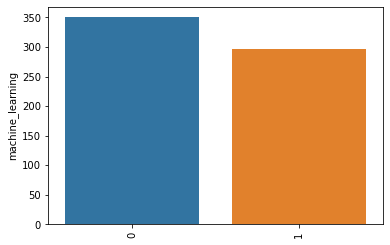

Graph for AI : total categories= 2


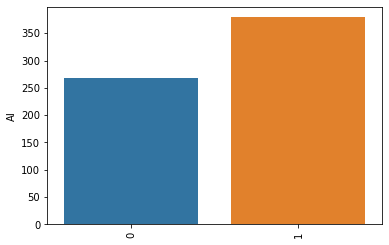

Graph for hadoop : total categories= 2


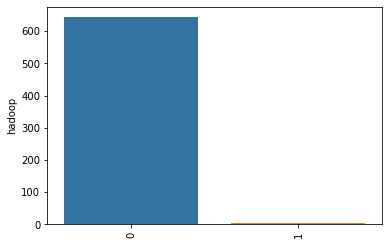

Graph for sql : total categories= 2


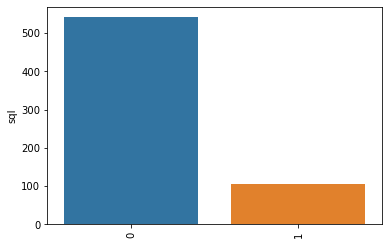

Graph for title : total categories= 7


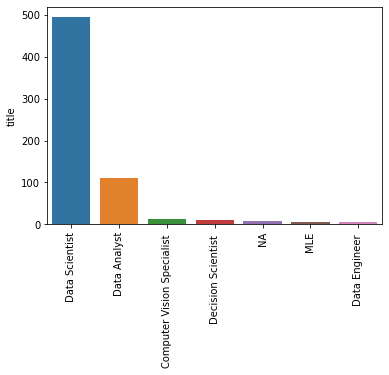

Graph for seniority : total categories= 3


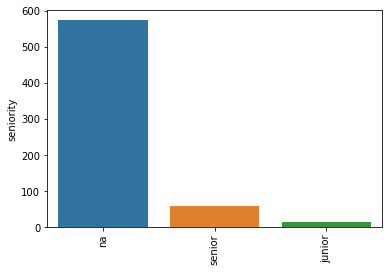

Graph for Company Name : total categories= 72


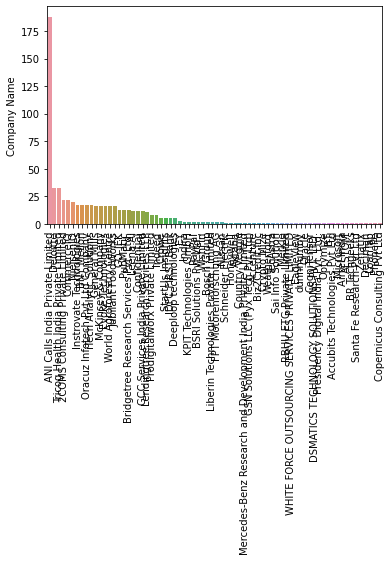

In [18]:
for i in df_categorical.columns:
    cat_vc=df_categorical[i].value_counts()
    print("Graph for {} : total categories= {}".format(i, len(cat_vc)))
    sn.barplot(x =cat_vc.index ,y = cat_vc)
    plt.xticks(rotation=90)
    plt.show()


Graph for Company Name : total categories= 25


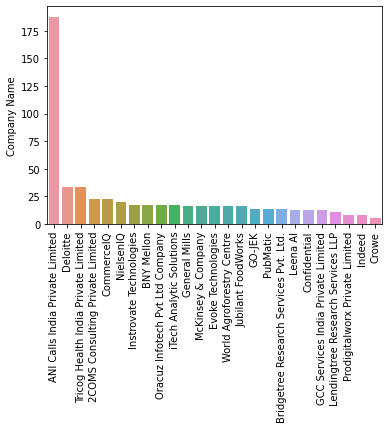

In [19]:
for i in df_categorical[['Company Name']].columns:
    cat_vc=df_categorical[i].value_counts()[:25]
    print("Graph for {} : total categories= {}".format(i, len(cat_vc)))
    sn.barplot(x =cat_vc.index ,y = cat_vc)
    plt.xticks(rotation=90)
    plt.show()

In [20]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'per hour', 'per month', 'min_sal',
       'max_sal', 'avg_sal', 'company_age', 'python', 'R', 'spark',
       'machine_learning', 'AI', 'hadoop', 'sql', 'title', 'seniority',
       'desc_len', 'sal_lac', 'sal_k'],
      dtype='object')

In [21]:
pd.pivot_table(df,index="title", values="avg_sal").sort_values("avg_sal",ascending=False)

,avg_sal
title,
Computer Vision Specialist,45.000000
Data Analyst,18.522727
NA,17.312500
Data Scientist,15.325253
Data Engineer,11.500000
Decision Scientist,8.500000
MLE,6.166667


In [22]:
pd.pivot_table(df,index=["title","seniority"], values="avg_sal")

avg_sal
title                       seniority           
Computer Vision Specialist  na         45.000000
Data Analyst                junior     12.500000
                            na         20.552326
                            senior     10.000000
Data Engineer               na         11.500000
Data Scientist              junior      8.500000
                            na         15.667040
                            senior     12.372340
Decision Scientist          na          8.500000
MLE                         na          6.166667
NA                          na         17.312500

In [23]:
pd.pivot_table(df,index=["title","Location"], values="avg_sal").sort_values("title",ascending=False)

avg_sal
title                       Location                     
NA                          Pune                 7.500000
                            Noida               12.500000
                            New Delhi           66.000000
MLE                         New Delhi            7.000000
                            Hyderābād            6.000000
Decision Scientist          Bangalore            8.500000
Data Scientist              Nashik              12.000000
                            Āgra                 4.000000
                            Vadodara             5.000000
                            Thiruvananthapuram   4.100000
                            Remote               4.500000
                            Pune                 7.202703
                            Noida               16.289157
                            New Delhi           90.050000
                            Navi Mumbai          4.750000
                            Mumbai               9.007353
                            Indore               4.500000
                            Hyderābād           18.592105
                            Gurgaon              6.785714
                            Chennai             12.486111
                            Batur                5.000000
                            Bangalore           15.566667
                            Ahmedabad            9.500000
Data Engineer               Remote              11.500000
Data Analyst                Bangalore            7.689655
                            Pune                 6.500000
                            Noida               12.500000
                            New Delhi           66.000000
                            Mumbai              11.000000
                            Hyderābād           12.135135
                            Calcutta             7.000000
Computer Vision Specialist  Gurgaon             45.000000

In [24]:
pd.pivot_table(df,index=["Location","title"], values="avg_sal", aggfunc="count").sort_values("Location")

avg_sal
Location           title                               
Ahmedabad          Data Scientist                    11
Bangalore          Data Analyst                      29
                   Data Scientist                   120
                   Decision Scientist                11
Batur              Data Scientist                     2
Calcutta           Data Analyst                       3
Chennai            Data Scientist                    36
Gurgaon            Computer Vision Specialist        12
                   Data Scientist                    21
Hyderābād          Data Analyst                      37
                   Data Scientist                    38
                   MLE                                5
Indore             Data Scientist                     2
Mumbai             Data Analyst                      12
                   Data Scientist                    68
Nashik             Data Scientist                     1
Navi Mumbai        Data Scientist                     2
New Delhi          Data Analyst                      16
                   Data Scientist                    20
                   MLE                                1
                   NA                                 1
Noida              Data Analyst                      12
                   Data Scientist                    83
                   NA                                 4
Pune               Data Analyst                       1
                   Data Scientist                    37
                   NA                                 3
Remote             Data Engineer                      5
                   Data Scientist                    17
Thiruvananthapuram Data Scientist                    20
Vadodara           Data Scientist                    16
Āgra               Data Scientist                     1

In [25]:
pd.pivot_table(df[df.title=="Data Scientist"],index=["Location"], values="avg_sal").sort_values("avg_sal",ascending=False)

,avg_sal
Location,
New Delhi,90.050000
Hyderābād,18.592105
Noida,16.289157
Bangalore,15.566667
Chennai,12.486111
Nashik,12.000000
Ahmedabad,9.500000
Mumbai,9.007353
Pune,7.202703


In [26]:
#salary X 'Rating', 'Type of ownership','Industry', 'Sector', 'Revenue', 'per hour', 'per month', 'python', 'R','spark',
#'machine_learning', 'AI', 'hadoop', 'sql', 'title', 'seniority','desc_len'

In [47]:
df_pivots=df[['Rating', 'Type of ownership','Industry', 'Sector', 'Revenue', 'per hour', 'per month', 'python', 'R','spark',
'machine_learning', 'AI', 'hadoop', 'sql','desc_len','avg_sal']]

for i in df_pivots.columns[:-1]:
    print('\033[1m  {} x salary \033[0m'.format(i) )
    print(pd.pivot_table(df_pivots, index= i, values="avg_sal").sort_values("avg_sal",ascending=False))
    print('\n')

  Rating x salary 
          avg_sal
Rating           
 4.2    28.250000
-1.0    26.645522
 4.3    20.804348
 4.0    14.646774
 3.8    13.934783
 3.6     7.928571
 4.5     7.909091
 3.5     7.050000
 3.4     7.000000
 4.4     6.578947
 3.9     6.535088
 4.1     6.500000
 3.1     5.500000
 5.0     4.500000


  Type of ownership x salary 
                                     avg_sal
Type of ownership                           
-1                                 33.431579
Company - Public                   14.409091
Company - Private                  13.247204
Unknown / Non-Applicable           12.227273
Subsidiary or Business Segment      7.000000
Telecommunications Service          7.000000
Unknown                             7.000000
Transport Equipment Manufacturing   6.500000
Private Practice / Firm             4.000000


  Industry x salary 
                                           avg_sal
Industry                                          
Fast-Food & Quick-Service Restaurant     

In [28]:
pd.pivot_table(df_pivots,index=["Revenue"],columns="python", values="avg_sal")

python,0,1
Revenue,,
$1 to $5 million (USD),NaN,10.583333
$10 to $25 million (USD),30.000000,NaN
$10+ billion (USD),10.793970,13.989865
$100 to $500 million (USD),7.000000,NaN
$2 to $5 billion (USD),45.312500,NaN
$25 to $50 million (USD),5.500000,12.500000
$5 to $10 billion (USD),8.500000,NaN
$500 million to $1 billion (USD),5.000000,8.500000
-1,26.680451,8.388889


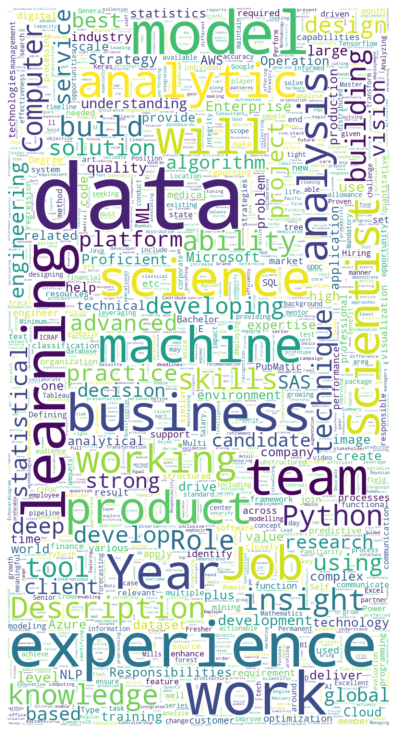

In [49]:
#Generating Wordcloud
from wordcloud import WordCloud

#Creating the text variable
text = " ".join(ele for ele in df['Job Description'])

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white', random_state=1,max_words=2000,width=800,height=1500).generate(text)

# Display the generated Word Cloud
plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

